In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import mudata as md

In [2]:
START_SAMPLES_COL = 9
file = '/Users/wuchh/project/single-cell-parsing/data/m107.jointcall.vcf'

In [3]:
def skiprows(file):

    with open(file) as handle:

        for i, row in enumerate(handle):
            if not row.startswith('#'):
                return i - 1 
            else: continue
            
        return 0

In [4]:
df = pl.read_csv(file, separator='\t', skip_rows=100)

In [5]:
# Remove sites that are not biallelic
num_alt_alleles = df['ALT'].map_elements(lambda x: len(x.split(',')), return_dtype=pl.Int32)

mask_biallelic = (num_alt_alleles == 1)
print(mask_biallelic.value_counts())

no_multiallelic = df.filter(mask_biallelic)

shape: (2, 2)
┌───────┬────────┐
│ ALT   ┆ count  │
│ ---   ┆ ---    │
│ bool  ┆ u32    │
╞═══════╪════════╡
│ true  ┆ 820377 │
│ false ┆ 110529 │
└───────┴────────┘


In [6]:
# Remove sites where variant is an indel
len_alt_allele = no_multiallelic['ALT'].map_elements(lambda x: len(x), return_dtype=pl.Int16)

mask_snv = (len_alt_allele == 1)
print(mask_snv.value_counts())

no_in = no_multiallelic.filter(mask_snv)

# Remove sites where variant is an indel
len_alt_allele = no_in['REF'].map_elements(lambda x: len(x), return_dtype=pl.Int16)

mask_snv = (len_alt_allele == 1)
print(mask_snv.value_counts())

no_indel = no_in.filter(mask_snv)

shape: (2, 2)
┌───────┬────────┐
│ ALT   ┆ count  │
│ ---   ┆ ---    │
│ bool  ┆ u32    │
╞═══════╪════════╡
│ true  ┆ 558952 │
│ false ┆ 261425 │
└───────┴────────┘
shape: (2, 2)
┌───────┬────────┐
│ REF   ┆ count  │
│ ---   ┆ ---    │
│ bool  ┆ u32    │
╞═══════╪════════╡
│ true  ┆ 476430 │
│ false ┆ 82522  │
└───────┴────────┘


In [7]:
cells = no_indel.columns[START_SAMPLES_COL:]

In [8]:
samples_dataframe = no_indel[cells]

In [9]:
samples_dataframe

107_P06_A01,107_P06_A02,107_P06_A03,107_P06_A04,107_P06_A05,107_P06_A06,107_P06_A07,107_P06_A08,107_P06_A09,107_P06_A10,107_P06_A11,107_P06_A12,107_P06_B01,107_P06_B02,107_P06_B03,107_P06_B04,107_P06_B05,107_P06_B06,107_P06_B07,107_P06_B08,107_P06_B09,107_P06_B10,107_P06_B11,107_P06_B12,107_P06_C01,107_P06_C02,107_P06_C03,107_P06_C04,107_P06_C05,107_P06_C06,107_P06_C07,107_P06_C08,107_P06_C09,107_P06_C10,107_P06_C11,107_P06_C12,107_P06_D01,…,107_P06_E12,107_P06_F01,107_P06_F02,107_P06_F03,107_P06_F04,107_P06_F05,107_P06_F06,107_P06_F07,107_P06_F08,107_P06_F09,107_P06_F10,107_P06_F11,107_P06_F12,107_P06_G01,107_P06_G02,107_P06_G03,107_P06_G04,107_P06_G05,107_P06_G06,107_P06_G07,107_P06_G08,107_P06_G09,107_P06_G10,107_P06_G11,107_P06_G12,107_P06_H01,107_P06_H02,107_P06_H03,107_P06_H04,107_P06_H05,107_P06_H06,107_P06_H07,107_P06_H08,107_P06_H09,107_P06_H10,107_P06_H11,107_P06_H12
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""",…,"""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""1/1:0,2:2:6:49,6,0"""
"""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""1/1:0,3:3:9:74,9,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""1/1:0,1:1:3:25,3,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:1,0:1:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""",…,"""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:0,0:0:0:0,0,0""","""0/0:2,0:2:0:0,0,0""","""0/0:0,0:0:0:0,0,0"

In [10]:
from copy import deepcopy

In [11]:
df_test = deepcopy(samples_dataframe)

In [12]:
df_test = df_test.with_columns(
    pl.all().map_elements(lambda x: x[:3], return_dtype=pl.String)
    )

In [13]:
df_test

107_P06_A01,107_P06_A02,107_P06_A03,107_P06_A04,107_P06_A05,107_P06_A06,107_P06_A07,107_P06_A08,107_P06_A09,107_P06_A10,107_P06_A11,107_P06_A12,107_P06_B01,107_P06_B02,107_P06_B03,107_P06_B04,107_P06_B05,107_P06_B06,107_P06_B07,107_P06_B08,107_P06_B09,107_P06_B10,107_P06_B11,107_P06_B12,107_P06_C01,107_P06_C02,107_P06_C03,107_P06_C04,107_P06_C05,107_P06_C06,107_P06_C07,107_P06_C08,107_P06_C09,107_P06_C10,107_P06_C11,107_P06_C12,107_P06_D01,…,107_P06_E12,107_P06_F01,107_P06_F02,107_P06_F03,107_P06_F04,107_P06_F05,107_P06_F06,107_P06_F07,107_P06_F08,107_P06_F09,107_P06_F10,107_P06_F11,107_P06_F12,107_P06_G01,107_P06_G02,107_P06_G03,107_P06_G04,107_P06_G05,107_P06_G06,107_P06_G07,107_P06_G08,107_P06_G09,107_P06_G10,107_P06_G11,107_P06_G12,107_P06_H01,107_P06_H02,107_P06_H03,107_P06_H04,107_P06_H05,107_P06_H06,107_P06_H07,107_P06_H08,107_P06_H09,107_P06_H10,107_P06_H11,107_P06_H12
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""",…,"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""1/1"""
"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""1/1""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""1/1""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""",…,"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0"""
"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""",…,"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""1/1""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0"""
"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""",…,"""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0/0""","""0

In [14]:
df_test_bin = df_test.select(
    pl.all().map_elements(lambda x: (x == "0/0") or (x == "0|0") or (x == ".|.") or (x == "./."), return_dtype=pl.Boolean)
)

In [15]:
df_test_bin

107_P06_A01,107_P06_A02,107_P06_A03,107_P06_A04,107_P06_A05,107_P06_A06,107_P06_A07,107_P06_A08,107_P06_A09,107_P06_A10,107_P06_A11,107_P06_A12,107_P06_B01,107_P06_B02,107_P06_B03,107_P06_B04,107_P06_B05,107_P06_B06,107_P06_B07,107_P06_B08,107_P06_B09,107_P06_B10,107_P06_B11,107_P06_B12,107_P06_C01,107_P06_C02,107_P06_C03,107_P06_C04,107_P06_C05,107_P06_C06,107_P06_C07,107_P06_C08,107_P06_C09,107_P06_C10,107_P06_C11,107_P06_C12,107_P06_D01,…,107_P06_E12,107_P06_F01,107_P06_F02,107_P06_F03,107_P06_F04,107_P06_F05,107_P06_F06,107_P06_F07,107_P06_F08,107_P06_F09,107_P06_F10,107_P06_F11,107_P06_F12,107_P06_G01,107_P06_G02,107_P06_G03,107_P06_G04,107_P06_G05,107_P06_G06,107_P06_G07,107_P06_G08,107_P06_G09,107_P06_G10,107_P06_G11,107_P06_G12,107_P06_H01,107_P06_H02,107_P06_H03,107_P06_H04,107_P06_H05,107_P06_H06,107_P06_H07,107_P06_H08,107_P06_H09,107_P06_H10,107_P06_H11,107_P06_H12
bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,…,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,false
true,true,true,true,true,true,true,true,true,true,true,false,true,true,true,true,true,true,true,true,true,true,false,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,false,true,true,true,true,true
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,false,true,true
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,false,true,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,false,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true
true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,…,true,true,true,true,true,true,true,true,false,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,true,t

In [16]:
min_cells = df_test_bin.sum_horizontal().map_elements(lambda x: 96-x, return_dtype=pl.Int32) > 10

In [17]:
min_cell = no_indel.filter(min_cells)
print(min_cell.shape)

(5375, 105)


In [18]:
def get_info_dp(x: str):

    for category in x.split(';'):

        if category.startswith('DP'):
            dp = category.split('=')[1]
            return int(dp)
        else: continue
        
    return 0

In [19]:
info_dp_values = min_cell['INFO'].map_elements(get_info_dp, return_dtype=pl.Int32)

In [20]:
min_cell_pass = min_cell.filter(info_dp_values>100)

In [75]:
min_cell_pass.with_columns(
    pl.concat_str(
        [
            pl.col("#CHROM"),
            pl.col("POS"),
            pl.col("REF"),
            pl.col("ALT")
        ],
        separator="_",
    ).alias("MUT_ID"),
)["MUT_ID"]

MUT_ID
str
"""chr1_4902532_A_T"""
"""chr1_9633816_A_C"""
"""chr1_9637165_T_A"""
"""chr1_9637172_C_A"""
"""chr1_13695239_T_C"""
…
"""chrX_165245299_C_A"""
"""chrX_169092201_T_C"""
"""chrX_169092207_G_C"""


In [21]:
df_test = min_cell_pass[:, START_SAMPLES_COL:]

In [22]:
samples = df_test.columns

In [23]:
df_test = df_test.with_columns(
    pl.all().map_elements(lambda x: x[:3], return_dtype=pl.String)
    )

In [24]:
def set_genotype(x):

    match x:
        case '0/0':
            return 0
        case '0|0':
            return 0
        case './.':
            return 0
        case '.|.':
            return 0
        case '1/1':
            return 1
        case '1|1':
            return 1
        case '0/1':
            return 1
        case '0|1':
            return 1
        case _:
            return 0

In [25]:
df_test = df_test.with_columns(
    pl.all().map_elements(set_genotype, return_dtype=pl.Int32)
    )

In [68]:
df_test

107_P06_A01,107_P06_A02,107_P06_A03,107_P06_A04,107_P06_A05,107_P06_A06,107_P06_A07,107_P06_A08,107_P06_A09,107_P06_A10,107_P06_A11,107_P06_A12,107_P06_B01,107_P06_B02,107_P06_B03,107_P06_B04,107_P06_B05,107_P06_B06,107_P06_B07,107_P06_B08,107_P06_B09,107_P06_B10,107_P06_B11,107_P06_B12,107_P06_C01,107_P06_C02,107_P06_C03,107_P06_C04,107_P06_C05,107_P06_C06,107_P06_C07,107_P06_C08,107_P06_C09,107_P06_C10,107_P06_C11,107_P06_C12,107_P06_D01,…,107_P06_E12,107_P06_F01,107_P06_F02,107_P06_F03,107_P06_F04,107_P06_F05,107_P06_F06,107_P06_F07,107_P06_F08,107_P06_F09,107_P06_F10,107_P06_F11,107_P06_F12,107_P06_G01,107_P06_G02,107_P06_G03,107_P06_G04,107_P06_G05,107_P06_G06,107_P06_G07,107_P06_G08,107_P06_G09,107_P06_G10,107_P06_G11,107_P06_G12,107_P06_H01,107_P06_H02,107_P06_H03,107_P06_H04,107_P06_H05,107_P06_H06,107_P06_H07,107_P06_H08,107_P06_H09,107_P06_H10,107_P06_H11,107_P06_H12
i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,…,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,…,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,…,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,…,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,…,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,…,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [26]:
data = df_test.transpose().to_numpy()

In [27]:
# fig = plt.Figure(figsize=(5,5))
# sns.histplot(info_dp_values)

# plt.xlim(0, 5000)

In [28]:
data.shape

(96, 4703)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import networkx as nx
from scipy.spatial.distance import pdist, squareform

random_state = np.random.RandomState(seed=42)
n_samples = data.shape[0]

# Compute the Hamming distance matrix
dist_matrix = squareform(pdist(data, metric='cosine'))

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(n_samples):
    for j in range(i + 1, n_samples):
        G.add_edge(i, j, weight=dist_matrix[i, j])

# Perform MDS
mds = MDS(dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(dist_matrix)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

random_state = np.random.RandomState(seed=42)
n_samples = data.shape[0]

# Compute the Hamming distance matrix
dist_matrix = squareform(pdist(data, metric='cosine'))

# Perform PCA
pca = PCA(random_state=random_state)
mds_coords = pca.fit_transform(dist_matrix)


In [51]:
df_mds = pd.DataFrame([pca_coords[:, 0], pca_coords[:, 1]])
df_mds = df_mds.T

In [61]:
df_mds = pd.DataFrame(mds_coords)
df_mds.columns = ['x', 'y']

In [62]:
df_mds['labels'] = samples

In [63]:
ss2_igg = md.read_h5mu('./data/treated_igg_ss2.h5md.gz')

In [64]:
meta_df = ss2_igg['mutation'].obs.reset_index()

In [65]:
cell_group = meta_df.set_index('cells')['Branch'].to_dict()
#meta_df.set_index('cells')['group'].to_dict()
#meta_df.groupby('group')['cells'].apply(list).to_dict()

In [66]:
df_mds['group'] = df_mds['labels'].apply(lambda x: cell_group[x] if x in cell_group.keys() else 'other')

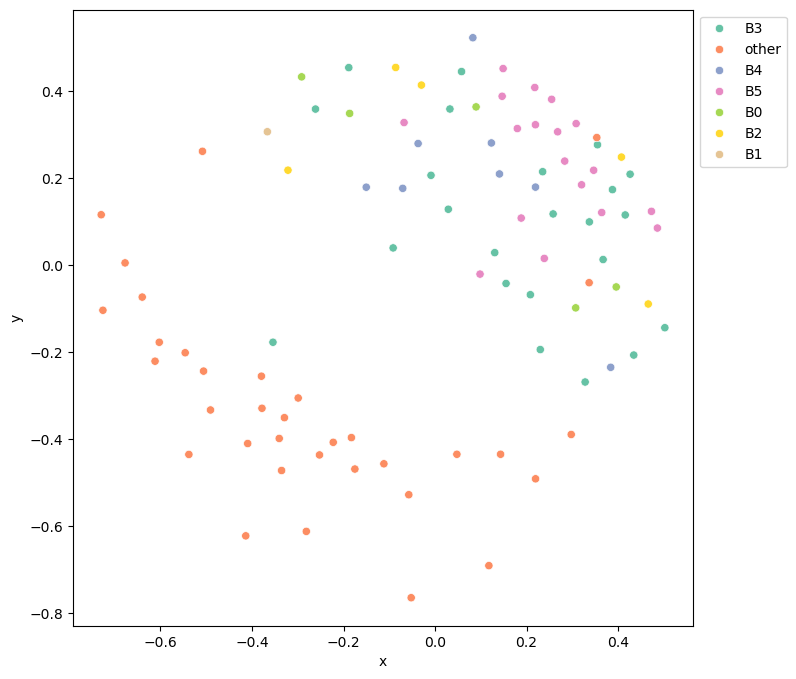

In [67]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(df_mds, x='x', y='y', hue='group', palette='Set2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
